In [ ]:
#Simple black and white parallel differential
from PIL import Image
import matplotlib.pyplot as plt
#Read image
img=Image.open('t1.jpg') 
#img =img.transpose(Image.ROTATE_90)
#show image
plt.imshow(img)
plt.show()
img.size

(23, 23)

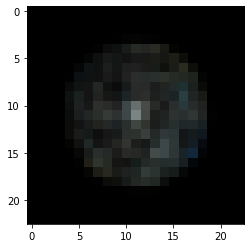

In [3]:
w, h = img.size
#instrumentName = 'harp'  #actual sound must be chosen after importing MIDI file into a DAW
#note_str=['X','C2', 'C3', 'G3', 'C4', 'E4', 'G4', 'A#4', 'C5', 'D5', 'E5', 'F#5', 'G5', 'G#5'] #first 13 notes of the harmonic series
#instrumentName = 'drums'
#note_str=['X','C2', 'D2', 'E2', 'F#2', 'G#2', 'A#2', 'G2', 'A2', 'C3', 'D#3', 'E3', 'C#3', 'A3'] #drum 'notes'
note_str=['C1', 'C2', 'G2', 'C3', 'E3', 'G3', 'A3', 'B3', 'D4', 'E4', 'G4', 'A4', 'B4',
         'D5', 'E5', 'G5', 'A5', 'B5','D6', 'E6', 'F#6', 'G6', 'A6',] #drum 'notes'
min_note=34
max_note=81
note_range = len(note_str) #max_note-min_note#
small_img=img.resize((round(w/h*note_range),note_range),Image.BILINEAR)
plt.imshow(small_img)
small_img.size

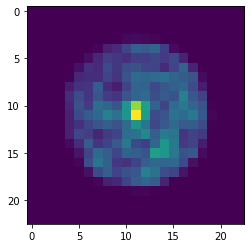

In [4]:
grey_img = small_img.convert('L')
plt.imshow(grey_img)

In [5]:
import numpy as np
pixels = np.array(grey_img, dtype=int)
#pixels.shape

In [6]:
differential = np.zeros(pixels.shape)
for j in range (1,round(w/h*note_range)):
    for i in range(0,note_range):
        differential[i,j]=abs(pixels[i,j]-pixels[i,j-1])

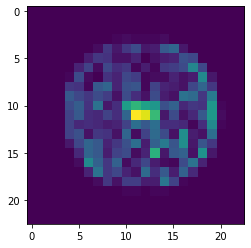

61.0 0.0 4.88468809073724


In [7]:
plt.imshow(np.asarray(differential))
plt.show()
print(np.max(differential),np.min(differential),np.average(differential))

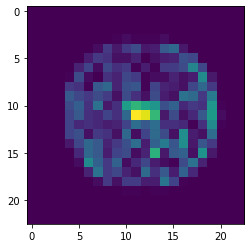

In [8]:
duration_scale= 64
min_velocity = 37
max_velocity = 127
velocity_range = max_velocity- min_velocity
x = differential
grey_img2 = small_img.convert('L')
pixels2 = np.round(np.array(grey_img2, dtype=int) / duration_scale)
velocity = np.round(x / np.max(x) * velocity_range) + min_velocity
plt.imshow(np.asarray(velocity))

In [9]:
from midiutil import MIDIFile
from audiolazy import str2midi
bpm = 64
midifile = MIDIFile(adjust_origin=True)
midifile.addTempo(track=0, time=0, tempo=bpm)    
for j in range(0,round(w/h*note_range)):
    for i in range(0,note_range):
         midifile.addNote(track=0, channel=0, pitch=str2midi(note_str[i]), time=j, duration=pixels2[i,j]+1, volume=int(velocity[i,j]))
with open("sbawpd1.mid", "wb") as f:
    midifile.writeFile(f)